# Seattle AirBnB data Analysis:
Using the seattle datasets, the following steps will be taken to conclude on factors that affect reservation prices.
1. Take a first look at the data to obtain any imediate insites about the data we have.
 - what missing information do we have?
 - what can we tell from the data at a first look?
2. Preparation of the data for further analysis.
 - remove columns and rows that are not needed or that may inpact our analysis.
 - impute missing values where needed.
3. What trends do we have in the data?
 - what the price ranges are for room types?
 - how are the lsisting spread throughout the dataset?
 - any time periods information vs price?
4. use ML for the further analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df_listing = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
#df_review = pd.read_csv('./reviews.csv')

## Exploration
### 1. Take a first look at the data to obtain any imediate insites about the data we have.

In [2]:
num_rows_listing = df_listing.shape[0]
num_columns_listing = df_listing.shape[1]
'There are {} rows and {} columns in the listings dataset.'.format(num_rows_listing, num_columns_listing)

'There are 3818 rows and 92 columns in the listings dataset.'

In [3]:
# We don't need any listing without the price so lets just drop those rows.
# There was only one in listings.csv.
df_listing = df_listing.dropna(subset = ['price'])
df_listing['price'].isnull().sum()

0

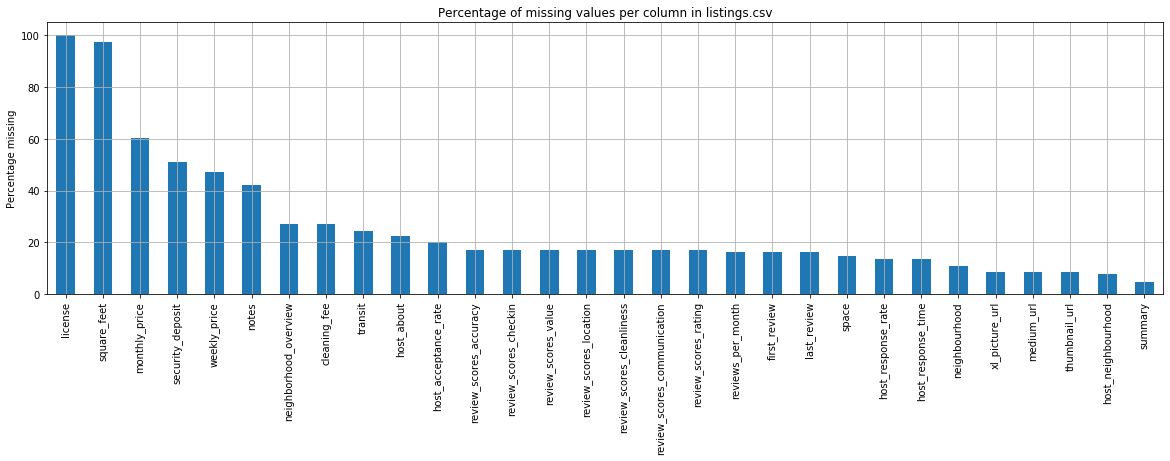

In [4]:
# What is teh proportion of missing values in the useful data.
visual_missing_data = df_listing.isnull().mean()[df_listing.isnull().mean() > 0.01]*100

visual_missing_data.sort_values(ascending = False).plot.bar(title = 'Percentage of missing values per column in listings.csv', figsize = [20,5], stacked = False);
plt.ylabel('Percentage missing');
plt.grid()

In [5]:
num_rows_calendar = df_calendar.shape[0]
num_columns_calendar = df_calendar.shape[1]
'There are {} rows and {} columns in the listings dataset.'.format(num_rows_calendar, num_columns_calendar)

'There are 1393570 rows and 4 columns in the listings dataset.'

price    32.938998
dtype: float64

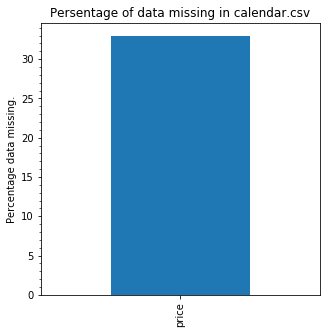

In [6]:
calendar_missing_data = df_calendar.isnull().mean()[df_calendar.isnull().mean() > 0]*100

calendar_missing_data.sort_values(ascending = False).plot.bar(title = 'Persentage of data missing in calendar.csv', figsize = [5,5], stacked = False);
plt.minorticks_on()
plt.ylabel('Percentage data missing.')
calendar_missing_data

## What can we tell from the data at a first look.

### From the listings.csv.

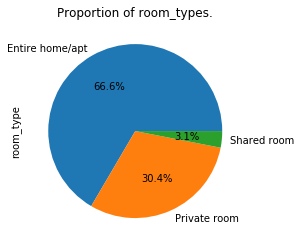

In [7]:
# What is the breakdown of the room_types (Entire home/apt, Private room, Shared room)
room_type_count = df_listing['room_type'].value_counts()
room_type_count.plot.pie(title = 'Proportion of room_types.', autopct = '%1.1f%%')

In [8]:
# What is the distribution of prices of the listing in Seattle?
df_listing_copy = df_listing
# First convert the price values to numeric values to plt.
def remove_currency_symbol(df, column_name, currency):
    '''
    This function removes teh currecny symbol
    '''
    df['column'] = df[column_name].replace({currency: ''}, regex = True)
    df['column'] = pd.to_numeric(df['column'], errors = 'coerce')
    df.drop([column_name], axis =1, inplace = True)
    df.rename(columns={'column': column_name}, inplace=True)
    return


remove_currency_symbol(df = df_listing_copy, column_name = 'price', currency = '\$')
#df_listing_copy['price']

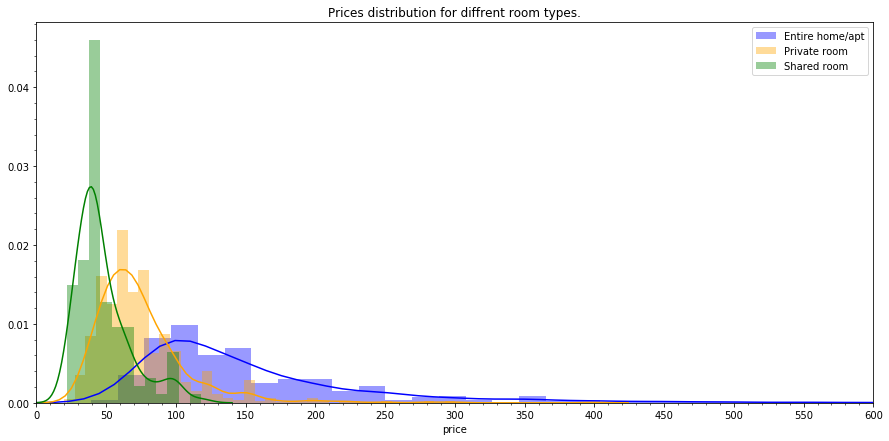

In [9]:
# Ploting the distribution of pricing over the entire seattle listings dataset.
plt.figure(figsize = (15,7));
sns.distplot(df_listing_copy[df_listing_copy.room_type == 'Entire home/apt'].price, color = 'blue', hist = True, label = 'Entire home/apt');
sns.distplot(df_listing_copy[df_listing_copy.room_type == 'Private room'].price, color = 'orange', hist = True, label = 'Private room');
sns.distplot(df_listing_copy[df_listing_copy.room_type == 'Shared room'].price, color = 'green', hist = True, label = 'Shared room');
plt.legend();
plt.title('Prices distribution for diffrent room types.')
plt.xticks([0, 50, 100, 150, 200, 250, 300,350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050]);
plt.minorticks_on()
plt.xlim(0, 600);

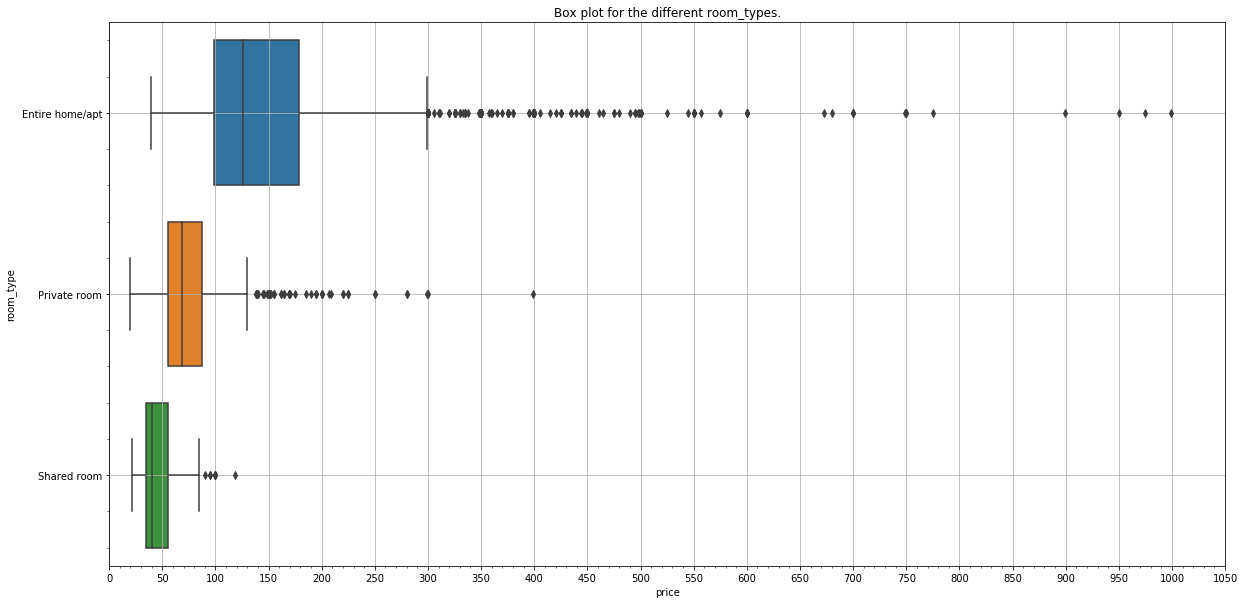

In [10]:
# What is teh range, mean, and any outliers in the pricing of the different room_types.
plt.figure(figsize=[20,10]);
sns.boxplot(x = 'price', y = 'room_type', data = df_listing_copy, fliersize = 5);
plt.title('Box plot for the different room_types.')
plt.xticks([0, 50, 100, 150, 200, 250, 300,350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200]);
plt.minorticks_on()
plt.grid()
plt.xlim(0, 1050);

In [11]:
print('The minimum price for {} is ${}'.format('Entire home/apt', df_listing_copy[df_listing_copy.room_type == 'Entire home/apt'].price.min()))
print('The minimum price for {} is ${}'.format('Entire home/apt', df_listing_copy[df_listing_copy.room_type == 'Entire home/apt'].price.max()))
print('The minimum price for {} is ${}'.format('Entire home/apt', df_listing_copy[df_listing_copy.room_type == 'Entire home/apt'].price.mean()))
print('')
print('The minimum price for {} is ${}'.format('Private room', df_listing_copy[df_listing_copy.room_type == 'Private room'].price.min()))
print('The minimum price for {} is ${}'.format('Private room', df_listing_copy[df_listing_copy.room_type == 'Private room'].price.max()))
print('The minimum price for {} is ${}'.format('Private room', df_listing_copy[df_listing_copy.room_type == 'Private room'].price.mean()))
print('')
print('The minimum price for {} is ${}'.format('Shared room', df_listing_copy[df_listing_copy.room_type == 'Shared room'].price.min()))
print('The minimum price for {} is ${}'.format('Shared room', df_listing_copy[df_listing_copy.room_type == 'Shared room'].price.max()))
print('The minimum price for {} is ${}'.format('Shared room', df_listing_copy[df_listing_copy.room_type == 'Shared room'].price.mean()))

The minimum price for Entire home/apt is $39.0
The minimum price for Entire home/apt is $999.0
The minimum price for Entire home/apt is $155.51102362204725

The minimum price for Private room is $20.0
The minimum price for Private room is $399.0
The minimum price for Private room is $75.04482758620689

The minimum price for Shared room is $22.0
The minimum price for Shared room is $118.0
The minimum price for Shared room is $47.547008547008545


The neaighbourhood_cleansed has 17 areas and they are: 
   - Magnolia, Queen Anne, Downtown, West Seattle, Cascade,  Capitol Hill, Central Area,
   - Ballard, Other neighborhoods, Interbay, Seward Park, Beacon Hill,
   - University District, Lake City, Rainier Valley, Northgate, Delridge.

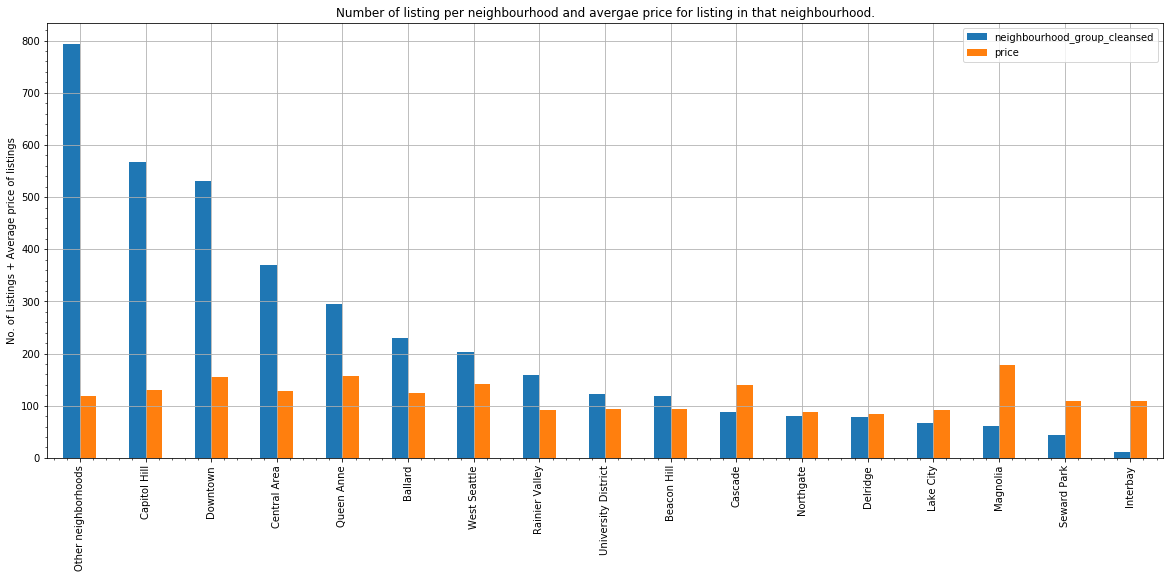

In [12]:
# Number of listing by neighbourhood and average price of listing.
pd.concat([df_listing_copy['neighbourhood_group_cleansed'].value_counts(),  df_listing_copy.groupby('neighbourhood_group_cleansed')['price'].mean()], 
          axis = 1).sort_values(ascending = False, by = ['neighbourhood_group_cleansed']).plot.bar(figsize = [20,8], stacked = False);
plt.title('Number of listing per neighbourhood and avergae price for listing in that neighbourhood.')
plt.ylabel('No. of Listings + Average price of listings')
plt.minorticks_on()
plt.grid()

In [13]:
def room_type_distplot_price(df, filter_column, filter_by = '', xlim_w = [0, 1200], ylim_h = [0, 1], xboxlim_w = [0, 1200]):
    '''
    
    '''
    filtered_df = df.loc[df[filter_column] == filter_by]
    
    plt.figure(figsize = (20,15));
    sns.distplot(filtered_df[filtered_df.room_type == 'Entire home/apt'].price, color = 'red', hist = True, label = 'Entire home/apt');
    sns.distplot(filtered_df[filtered_df.room_type == 'Private room'].price, color = 'green', hist = True, label = 'Private room');
    sns.distplot(filtered_df[filtered_df.room_type == 'Shared room'].price, color = 'blue', hist = True, label = 'Shared room');
    plt.legend();
    plt.xticks([0, 50, 100, 150, 200, 250, 300,350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200]);
    plt.minorticks_on()
    plt.xlim(xlim_w)
    plt.ylim(ylim_h)
    plt.title('Price distribution for {}'.format(filter_by))
    
    plt.figure(figsize=[20,15]);
    sns.boxplot(x = 'price', y = 'room_type', data = filtered_df, fliersize = 5);
    plt.title('Box plot of the different room_types for {}.'.format(filter_by))
    plt.xticks([0, 50, 100, 150, 200, 250, 300,350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200]);
    plt.minorticks_on()
    plt.xlim(xboxlim_w)
    plt.grid()
    
    return

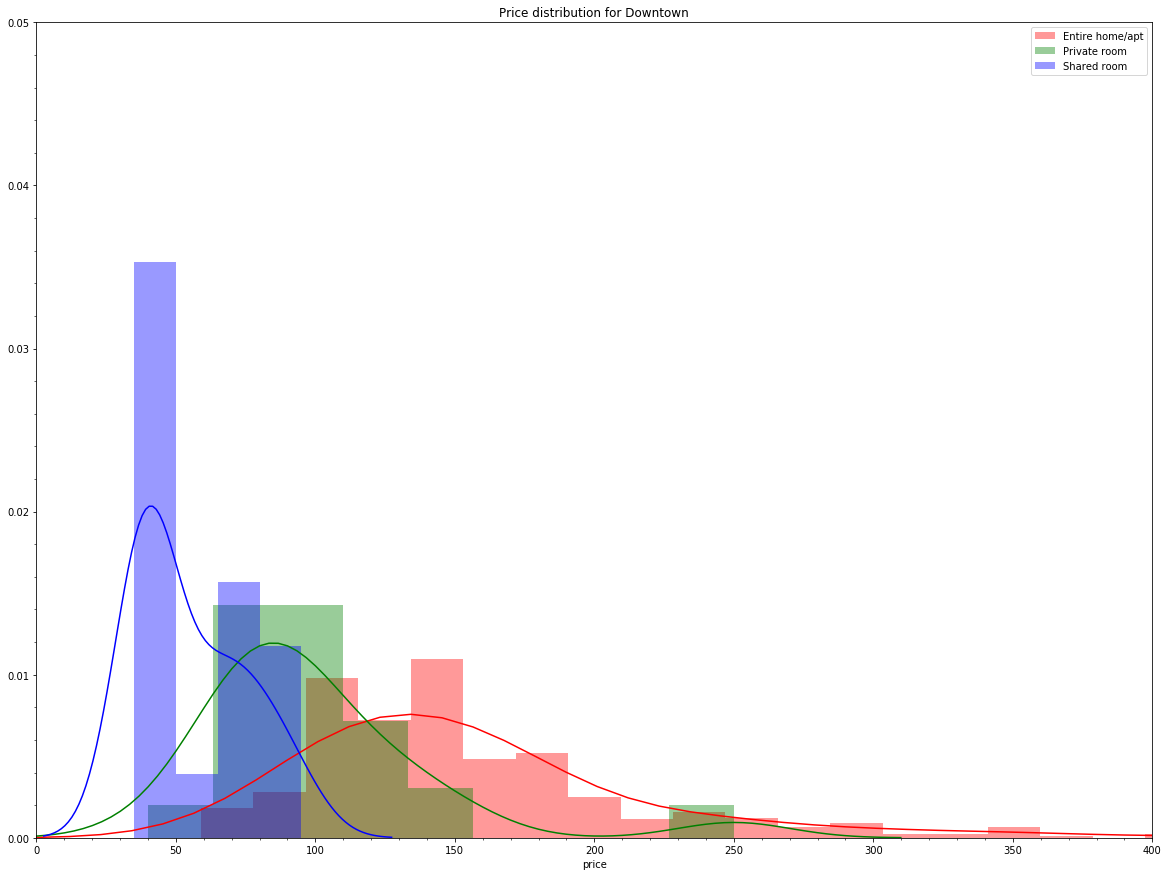

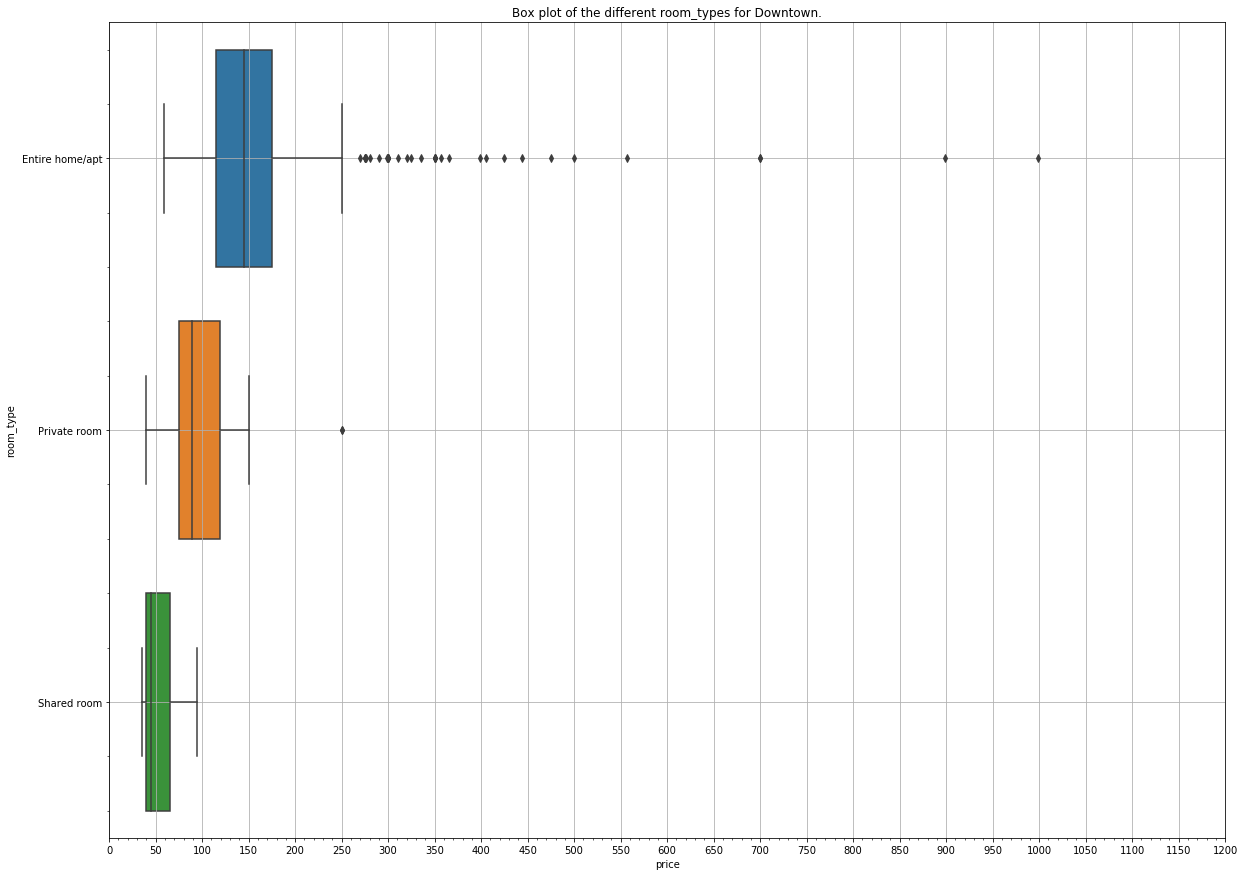

In [14]:
room_type_distplot_price(df = df_listing_copy, 
                         filter_column = 'neighbourhood_group_cleansed',
                         filter_by = 'Downtown', xlim_w = (0, 400), ylim_h = (0, 0.05))

### From the calendar.csv

In [15]:
num_rows_calendar = df_calendar.shape[0]
num_columns_calendar = df_calendar.shape[1]
'There are {} rows and {} columns in the listings dataset.'.format(num_rows_calendar, num_columns_calendar)

'There are 1393570 rows and 4 columns in the listings dataset.'

In [16]:
# converting the object type for the date on the original calendar.csv to datetime format.
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format = '%Y/%m/%d')

# Converting creting month, year and month-year columns.
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year

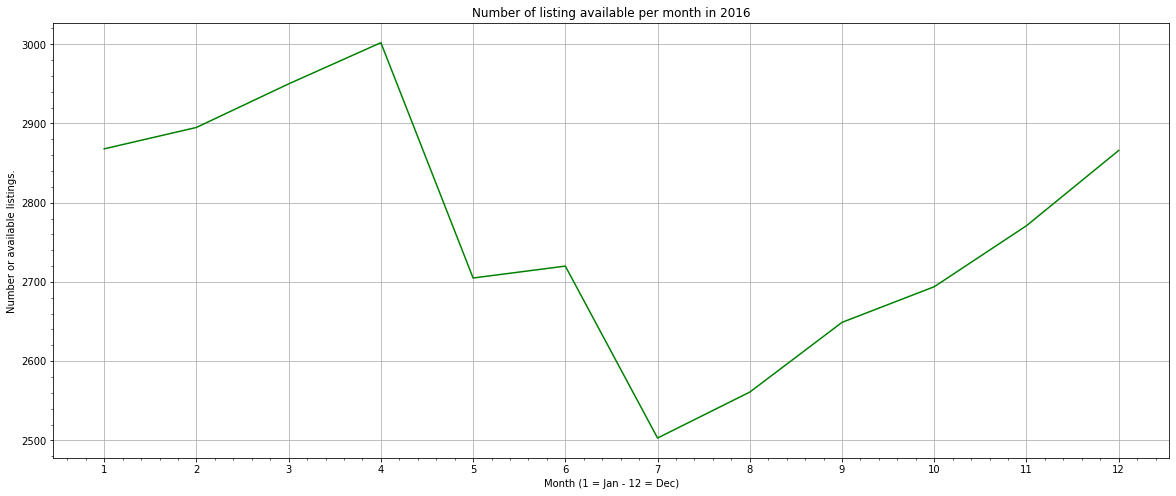

In [17]:
listing_by_month = df_calendar[df_calendar.available == 't']

number_to_plot = pd.Series([12])


for i in range(1, 13):
    number_to_plot[i] = len(listing_by_month[(listing_by_month['month'] == i) & (listing_by_month['year'] == 2016)]['listing_id'].unique())

number_to_plot = number_to_plot.drop(0)


plt.figure(figsize = (20, 8))
sns.lineplot(data = number_to_plot, color = 'green')
plt.title('Number of listing available per month in 2016')
plt.xlabel('Month (1 = Jan - 12 = Dec)')
plt.ylabel('Number or available listings.')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.minorticks_on()
plt.grid()

In [18]:
'The minimum date is {} and the maximum date is {} in calendar.csv'.format(df_calendar['date'].min(), df_calendar['date'].max())

'The minimum date is 2016-01-04 00:00:00 and the maximum date is 2017-01-02 00:00:00 in calendar.csv'

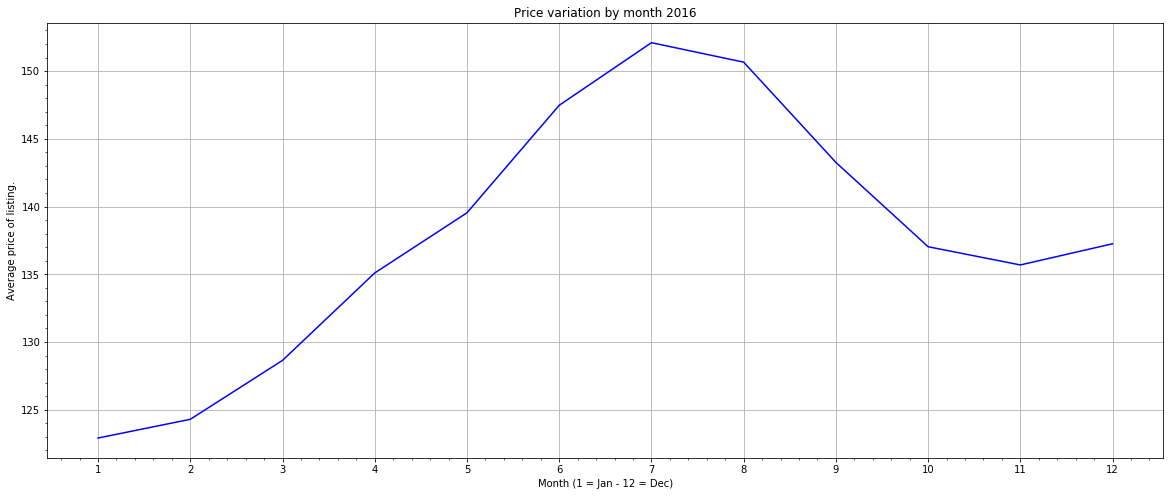

In [19]:
df_calendar['price'] = df_calendar['price'].astype(str)
df_calendar['price'] = df_calendar['price'].str.replace("[$, ]", "").astype("float")

df_calendar_no_nan = df_calendar.dropna(subset= ['price'])


avg_price_month = df_calendar.groupby(['month'])['price'].mean()


plt.figure(figsize = (20, 8))
sns.lineplot(data = avg_price_month, color = 'blue')
plt.title('Price variation by month 2016')
plt.xlabel('Month (1 = Jan - 12 = Dec)')
plt.ylabel('Average price of listing.')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.minorticks_on()
plt.grid()

# Preparation of the data for further analysis.

In [20]:
def unwanted_elements(df, column, str1='', str2='', str3='', str4='', str5='', new1='', new2='', new3='', new4='', new5=''):
    '''
    INPUT:
       df - the dataframe with the column that needs some chareaters removed.
       column - the sring value for the column to be work on.
       str1 to str4 are the characters you wnat removed from the dataframe.
       new1 to new4 are the replacement characters for str1 to str4 respectively.
       
    OUTPUT:
    '''
    df[column] = pd.Series(df[column]).str.replace(str1, new1, regex = True).replace(str2, new2, regex = True).replace(str3, new3, regex = True).replace(str4, new4, regex = True).replace(str5, new5, regex = True)
    return df[column]

def list_column_to_sort_columns(df, column_name):
    '''
    
    '''
    # Remove the unwanted characters in the columns.
    unwanted_elements(df = df, column = column_name, str1 = '{', str2 = '}', 
                      str3 = '"', str4 = "'")
    # Next move the column to a temp bucket.
    df_temp = df[column_name]
    # Breakdow the column into a nested list.    
    list_col = df_temp.str.split(',').tolist()
    
    #
    index_list = []
    index_count = 0
    unique_list = []
    for item in list_col:
        for element in item:
            if element not in unique_list:
                unique_list.append(element)
        index_list.append(index_count)
        index_count += 1
    
    # Create a dataframewhich is ordered under a column that matches.
    count=0
    df2 = pd.DataFrame(columns = unique_list, index = index_list)
    for item in list_col:
        for element in item:
            df2[element][count] = element
        count += 1
    
    # Convert the not null values in these columns into 1 and null into 0.
    df2 = df2.notnull().astype('int')
    return df2

In [21]:
# Combine the new created columns of the amenities to the df_listing_copy and rename df.
new_df_listings_copy = pd.concat([df_listing_copy, 
                                  list_column_to_sort_columns(df_listing_copy, 'amenities')],
                                 axis = 1, sort = False)


## Joining the new_df_listings_copy and df_calendar

In [ ]:
# Change the column neame id to listing_id for the joining of these two datasets.
new_df_listings_copy = new_df_listings_copy.rename(index = str, columns = {'id': 'listing_id'})

# the new joint dataframe is df_listing_calendar.
df_listing_calendar = pd.merge(new_df_listings_copy, df_calendar, on = 'listing_id')

In [ ]:
# What is the proportion of missing values in the useful data.
visual_missing_data2 = df_listing_calendar.isnull().mean()[df_listing_calendar.isnull().mean() > 0.0]*100

visual_missing_data2.sort_values(ascending = False).plot.bar(title = 'proposrtion of missing in listings.csv', figsize = [20,5], stacked = False);
plt.ylabel('Percentage missing');
plt.grid()

In [ ]:
unwanted_columns = {'available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month', 'host_verifications', 'neighbourhood_cleansed', 'extra_people', 'host_since',
                   'amenities', 'date'}

In [ ]:
# Now we drop the unwanted_columns from our dataframe.
df_listing_calendar = df_listing_calendar.drop(columns = unwanted_columns)

In [ ]:
visual_missing_data3 = df_listing_calendar.isnull().mean()[df_listing_calendar.isnull().mean() > 0.0]*100

visual_missing_data3.sort_values(ascending = False).plot.bar(title = 'proposrtion of missing in listings.csv', figsize = [20,5], stacked = False);
plt.ylabel('Percentage missing');
plt.grid()

### Clean the data we have some more.

In [ ]:
# Remove the % symbol in the host_respsonse_rate.
df_listing_calendar['response_rate'] = df_listing_calendar['host_response_rate'].str.replace('%', '').astype('float')

# For those values that we will replace the missing values with the mean.
column_nan_withmean = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value','response_rate']
for column in column_nan_withmean:
    df_listing_calendar.fillna(df_listing_calendar[column].mean(), inplace = True)
    
# Drop host_response_rate columns.
df_listing_calendar = df_listing_calendar.drop(columns = ['host_response_rate'])

In [ ]:
# For those that we are replacing the nan values with the mode.
column_nan_withmode = ['bedrooms', 'bathrooms', 'beds']
for column in column_nan_withmode:
    df_listing_calendar.fillna(df_listing_calendar[column].mode(), inplace = True)

### We now have no missing values in our data.

In [ ]:
# How does the data we now have corrolate with each other.  Numeriaccal columns only.

cols = ['accommodates', 'bathrooms','bedrooms', 'beds', 'guests_included', 
        'number_of_reviews', 'review_scores_rating', 'price_x', 'response_rate']

df5 = df_listing_calendar[cols]
sns.set(rc = {'figure.figsize': (10,10)})
sns.heatmap(df5.corr(), annot = True, fmt = ".2f", cbar = True, square = True);

## Machine Learning
This time we only look at linear regression.

In [ ]:
def create_dummy_df(df, cat_cols, dummy_na=False):
    '''
    
    '''
    for col in cat_cols:
        try:
            # for eact category add a dummy variable and drop the original colunn.
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
            
        except:
            continue
    return df

In [ ]:
def clean_fit_linear_model(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    '''
    # create a dataframe cat_df with only the object types.
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns
    
    # Create the dummy variables from the categorical datafame cat_df.
    df = create_dummy_df(df, cat_cols, dummy_na=False)
    
    # Fill in the missing values in the df with mean values.
    fill_mean = lambda col: col.fillna(col.mean())
    df = df.apply(fill_mean, axis=0)
    
    # Split the df into explanatory and response variables.
    X = df.drop(response_col, axis = 1)
    y = df[response_col]
    
    # Split into train and test.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = rand_state)
    
    lm_model = LinearRegression(normalize = True)
    lm_model.fit(X_train, y_train)
    
    # Prediction using the test data.
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    
    # How well do we score with the linear model
    test_score = r2_score(y_test, y_test_preds)
    train_score  = r2_score(y_train, y_train_preds)
    #test_mean2_error = mean_square_error
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [ ]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_model(df_listing_calendar, 'price_x')

In [ ]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

## Ramdom forest trial.

In [ ]:
def clean_fit_RandForest_model(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    '''
    # create a dataframe cat_df with only the object types.
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns
    
    # Create the dummy variables from the categorical datafame cat_df.
    df = create_dummy_df(df, cat_cols, dummy_na=False)
    
    # Fill in the missing values in the df with mean values.
    fill_mean = lambda col: col.fillna(col.mean())
    df = df.apply(fill_mean, axis=0)
    
    # Split the df into explanatory and response variables.
    X = df.drop(response_col, axis = 1)
    y = df[response_col]
    
    # Split into train and test.
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = test_size, random_state = rand_state)
    
    rfm_model = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = rand_state, n_jobs = -1)
    rfm_model.fit(X_train_rf, y_train_rf)
    
    # Prediction using the test data.
    y_test_preds = rfm_model.predict(X_test_rf)
    y_train_preds = rfm_model.predict(X_train_rf)
    
    # How well do we score with the linear model
    rf_test_score = r2_score(y_test_rf, y_test_preds)
    rf_train_score  = r2_score(y_train_rf, y_train_preds)
    #test_mean2_error = mean_square_error
    
    return rf_test_score, rf_train_score, rfm_model, X_train_rf, X_test_rf, y_train_rf, y_test_rf

In [ ]:
rf_test_score, rf_train_score, rfm_model, X_train_rf, X_test_rf, y_train_rf, y_test_rf = clean_fit_RandForest_model(df_listing_calendar, 'price_x')

In [ ]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(rf_train_score, rf_test_score))